<img src="./img/HWNI_logo.svg"/>

# Lab B - Error Bars

In [1]:
# makes our plots show up inside Jupyter
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import util.utils as utils
import util.shared as shared

shared.format_plots()
shared.format_dataframes()

In the last section of the previous lab, we looked at confidence intervals, which are one way of expressing our uncertainty about inferences drawn from the data. When we wish to present this uncertainty visually, we use *error bars*. There are many kinds of error bars, each of which tells you something different about the uncertainty in the data being graphed. For a thorough introduction to error bars, check out [this article from Nature Methods](https://www.nature.com/nmeth/journal/v10/n10/full/nmeth.2659.html). If you're unable to access that article behind Nature's paywall, check out [this article from the Berkeley Science Review](http://berkeleysciencereview.com/errorbars-anyway/).

Below, we'll generate a dataset containing two groups, one subjected to a treatment and the other left as a control. After looking at the data with histograms, we'll plot the means of the two groups along with the three most prominent different kinds of error bars.

## Loading and Visualizing the Data

In [3]:
test_data = utils.generate_dataset2(N=1000)
test_data.sample(10)

,score,group
791,-1.328213,control
668,1.433043,control
1154,-1.466030,treatment
1523,0.788167,treatment
655,0.487473,control
1793,0.011114,treatment
1474,1.972906,treatment
831,1.398092,control
1454,-0.166507,treatment
1452,-0.398449,treatment


Use seaborn's `distplot` to plot the histograms of the treatment and control groups. The simplest, but least powerful, way to do this is to just use `distplot` twice. Instructions for making this style of plot using the more complex, but more powerful, `FacetGrids` method are in the tutorial on plotting with seaborn.

If you go with the first route, you'll need to separate the groups manually with pandas. The template below shows how to do this. There's information on how this works in [the tutorial on pandas](../../Part%2000%20-%20Setup%20and%20Review/00%20-%20Setup/Tech%20Tools%20Tutorial/Tutorial%20C%20-%20Organizing%20Data%20with%20Pandas.ipynb), in the section on *Indexing into DataFrames*.

Template:
```python
sns.distplot(test_data.score[test_data.group == 'control'], kde=False)
sns.distplot(test_data.score[?], kde=False)
```

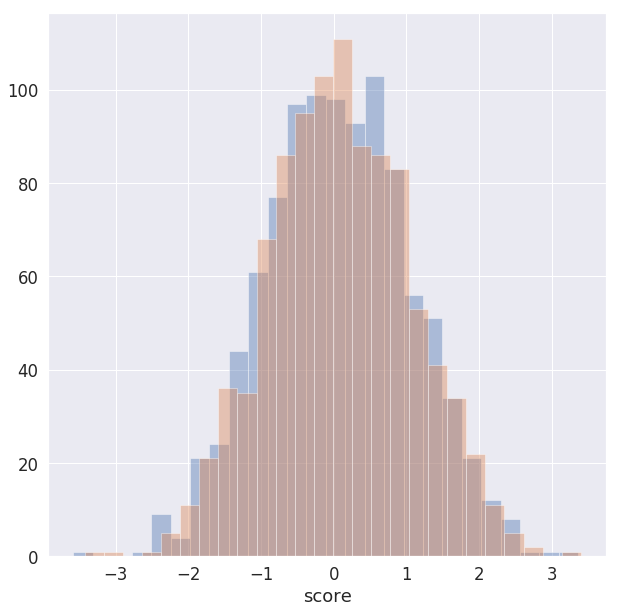

In [4]:
# answer
## check out this function, in util/utils.py for the more general approach
#utils.plot_groups(test_data,x="score",by="group");

sns.distplot(test_data.score[test_data.group == 'control'], kde = False);
sns.distplot(test_data.score[test_data.group == 'treatment'], kde = False);

#### Q1 Do these two data distributions seem different to you? Why or why not?

<font color='#1874CD'> **There's no right answer here. They are very similar indeed, but there are some slight differences that become especially obvious if you increase N.**

## Confidence Interval Error Bars

We begin by plotting one of the most common error bars, the "95% confidence interval" error bar. 

#### Q2 What kind of uncertainty this bar indicate? Relatedly, in what situation is this error bar the right kind of error bar to attach to our data?

<font color='#1874CD'> **It reflects our uncertainty about the location of the mean. It's best for indicating whether a difference in means is likely due to chance or not.**

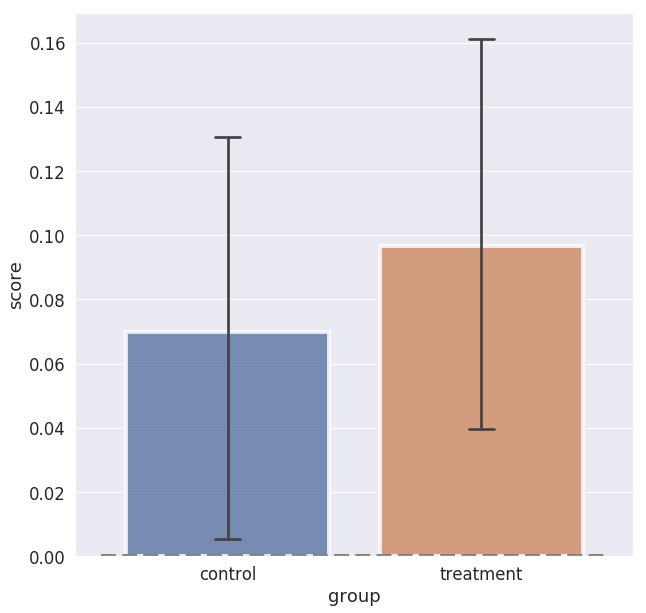

In [5]:
sns.barplot(data=test_data, x='group',y='score',
            ci=95,
            capsize=.1, linewidth=4,
            alpha=0.8, edgecolor='white');

utils.add_axis_line(plt.gca())

For most samples, the two bars don't quite overlap, or overlap by a small amount.

#### Q2 If the 95% CI bars overlap just slightly, does this mean that one cannot reject the hypothesis that the means differ with 95% confidence?

<font color='#1874CD'>  **No. In fact, if the bars were just touching, the confidence that the means are different is much higher than 95%!**

## Standard Error of the Mean Error Bars

Another common error bar is the "standard error of the mean" error bar. 

#### Q3 What kind of uncertainty does this error bar indicate, and when is it the appropriate error bar to plot?

<font color='#1874CD'>  **It shows the estimated standard deviation of the sampling distribution of the mean. For datasets whose means have a Gaussian sampling distribution and whose standard deviation is known, this corresponds to a 68% confidence interval. If the standard deviation is not known but is intead estimated from the data, as is usually the case, then the level of confidence is lower, but approaches 68% as the sample size goes up. There are very few situations in which this error bar is appropriate, as the standard deviation of the sampling distribution isn't very useful on its own, especially as a visual cue.**

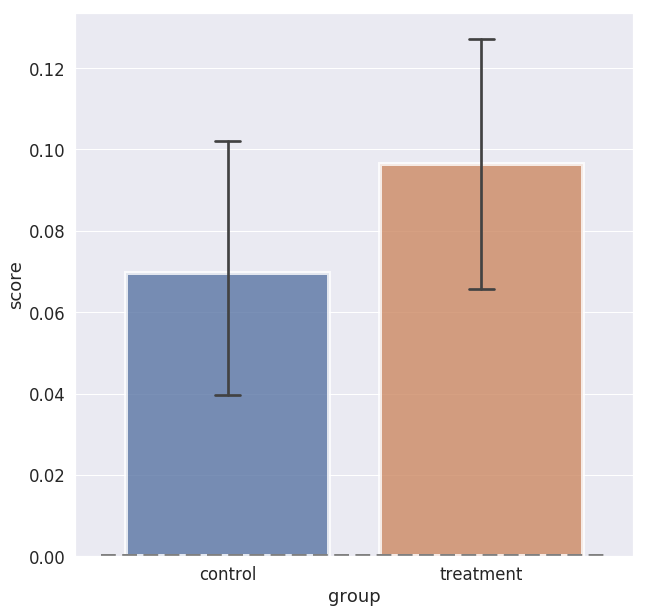

In [6]:
sns.barplot(data=test_data, x='group', y='score', 
            ci=68,
            capsize=.1, linewidth=4, alpha=0.8, edgecolor='white');

utils.add_axis_line(plt.gca())

## Standard Deviation Error Bars

Lastly, we have a rather uncommon error bar, the "standard deviation of the data" error bar. 

#### Q4 How is it related to the "standard error of the mean" bar? What happens to each as the number of datapoints collected gets larger?

<font color='#1874CD'>  **The standard deviation of the dataset is an estimator of the standard deviation of the population. The SEM is equal to the standard deviation divided by the square root of the size of the dataset, and it is the standard deviation of a sampling distribution, that of the mean.  While the standard error gets smaller as the size of the dataset gets bigger, the standard deviation does not -- it instead converges to the true value.**

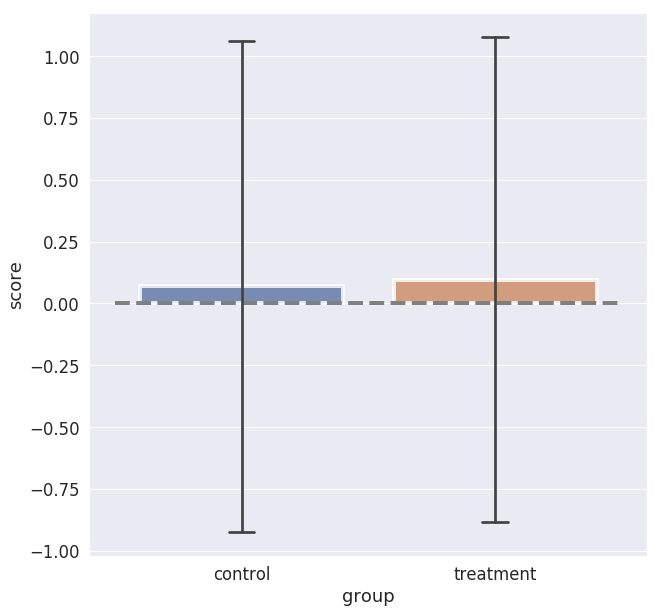

In [7]:
sns.barplot(data=test_data, x='group', y='score',
            ci="sd", 
            capsize=.1, linewidth=4, alpha=0.8, edgecolor='white');

utils.add_axis_line(plt.gca())

Some people would consider the two distributions, of the control group scores and the treatment group scores, to be quite similar. 

#### Q5 Which error bar or bars capture this intuition? Others might consider them to be quite different. Which error bar or bars capture this intuition, and why?

<font color='#1874CD'> **Those who consider the distributions similar would point to the standard deviation bars, which show that the datasets overlap substantially. Those who consider the distributions different would point to either the standard error of the mean bars, or, more reliably, the confidence interval bars, and note that the difference is not one you would expect to see by chance.**

**This difference in deciding whether a difference between distributions is important or notable is a contrast of the definitions of "scientific" or "practical" significance versus the definition of significance as "statistical". We'll cover this more in later sections.**

Relatedly, let's consider the use of these error bars in decision-making. Let's say our "treatment" was a lifestyle change, like cutting a particular food out of your diet, and our "score" was a measure of overall mortality -- higher values meaning higher risk of death.

#### Q6 Which error bars would a nation's public health official use to decide whether to recommend that the citizens cut that food from their diet? Which error bars might an informed citizen use to decide how important heeding that recommendation is? Can you explain the difference?

Hint: imagine I give you one datapoint, which I took from one of the two distributions. Will it be easy to tell which distribution it came from? What about if I gave you one hundred million datapoints, all from the same distribution? Consider that a public health official is making decisions from the perspective of an entire population, while an individual is making decisions from the perspective of a single sample.

<font color='#1874CD'> **A public health official cares very deeply about even small effects -- when applied to a large population, their aggregate effect is substantial. Put another way, even if an effect is only reliably detectable in large datasets, it's relevant for public health. A confidence interval from a large dataset tells you exactly whether an effect was detected in a large population.**

**An individual, however, only lives one life, not several million, so far as we can tell. If the difference caused by a lifestyle change is so small that it takes the observation of thousands of individuals to detect, it may be not worth the effort, from the individual's perspective.**

**Challenge Question**: 

Seaborn plots error bars using a method called *bootstrapping*. Check out MIT Open CourseWare's lecture notes, [*Bootstrapping Confidence Intervals*](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading24.pdf), to learn more.

In fact, the standard error of the mean bars plotted by seaborn are *also* confidence intervals, with the confidence level determined by the keyword argument `ci`. In addition to making it possible to easily plot the confidence interval error bars, this also makes it possible to easily plot the standard error of the mean for datasets of sufficient size, using, as above, a `ci` of 68. 

#### Can you explain why?

<font color='#1874CD'> **The ± one SEM interval around the mean is, for data with a Gaussian sampling distribution, also approximately a 68% confidence interval.**